In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [13]:
task=pd.read_csv("/Users/tejastammewar/Desktop/pythonPractise/ieeetask.csv")
task

,Class,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12
0,C1,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,C2,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,C3,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,C4,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,C5,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,C81,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,C82,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,C83,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,C84,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [14]:
target=task.Class
task=task.drop('Class',axis=1)


In [15]:
task

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [16]:
target

0      C1
1      C2
2      C3
3      C4
4      C5
     ... 
80    C81
81    C82
82    C83
83    C84
84    C85
Name: Class, Length: 85, dtype: object

In [29]:
categoricalcol=['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8','Feature 9']
numeric=['Feature 10','Feature 11','Feature 12']
x_categorical=task[categoricalcol]
x_categorical


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,1,0,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0
81,0,1,0,0,0,0,1,0,0
82,0,1,0,0,0,0,0,0,1
83,0,0,1,0,0,0,1,0,0


In [21]:
x_numeric=task[numeric]
x_numeric

,Feature 10,Feature 11,Feature 12
0,0.732,0.860,66.971725
1,0.604,0.511,67.602936
2,0.011,0.116,32.261086
3,0.011,0.511,46.116505
4,0.906,0.511,52.341465
...,...,...,...
80,0.220,0.116,45.466282
81,0.093,0.116,39.011898
82,0.313,0.313,44.375519
83,0.186,0.267,41.904308


In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_scaled=scaler.fit_transform(x_numeric)
num_scaled
#handling the numeric features is important so sacling them to a 
# standardized scale increases the accuracy

array([[ 9.01260517e-01,  1.37691389e+00,  1.13860253e+00],
       [ 4.45921949e-01,  1.48273404e-01,  1.18175474e+00],
       [-1.66357582e+00, -1.24230805e+00, -1.23436135e+00],
       [-1.66357582e+00,  1.48273404e-01, -2.87147190e-01],
       [ 1.52023639e+00,  1.48273404e-01,  1.38417008e-01],
       [-4.85470930e-02,  1.04951119e+00,  2.10439862e-03],
       [ 4.45921949e-01,  1.04951119e+00,  4.51051944e-01],
       [-5.89261594e-01,  1.48273404e-01, -1.83892358e+00],
       [ 1.52023639e+00, -5.06532036e-01, -8.41275807e-01],
       [ 4.45921949e-01, -5.06532036e-01, -1.08009112e+00],
       [ 4.45921949e-01,  1.48273404e-01, -7.75367692e-01],
       [ 9.01260517e-01,  1.48273404e-01, -9.77548492e-01],
       [-1.53906920e+00, -5.06532036e-01, -1.76323324e+00],
       [ 9.01260517e-01,  1.48273404e-01, -5.49968372e-01],
       [ 9.01260517e-01, -1.53098572e+00, -7.42175591e-01],
       [-1.25092531e+00, -1.53098572e+00, -4.94125239e-01],
       [ 9.01260517e-01, -5.06532036e-01

In [39]:
transformedtask=pd.concat([x_categorical,pd.DataFrame(num_scaled,columns=numeric)],axis=1)
transformedtask

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12
0,1,0,1,0,0,1,0,1,0,0.901261,1.376914,1.138603
1,1,0,0,0,1,0,0,1,0,0.445922,0.148273,1.181755
2,0,0,0,0,0,0,0,0,0,-1.663576,-1.242308,-1.234361
3,0,0,0,0,0,0,0,0,0,-1.663576,0.148273,-0.287147
4,0,1,0,0,0,0,0,0,0,1.520236,0.148273,0.138417
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,-0.920093,-1.242308,-0.331599
81,0,1,0,0,0,0,1,0,0,-1.371875,-1.242308,-0.772848
82,0,1,0,0,0,0,0,0,1,-0.589262,-0.548778,-0.406168
83,0,0,1,0,0,0,1,0,0,-1.041043,-0.710719,-0.575111


In [51]:
"""" splitting the dataset is important for model to not know all the 
 training sets before hand and so that some training sets are 
 reserved as test sets to test the prediction """

'" splitting the dataset is important for model to not know all the \n training sets before hand and so that some training sets are \n reserved as test sets to test the prediction '

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transformedtask,target,test_size=0.2)

In [31]:
len(x_train)

68

In [32]:
len(x_test)

17

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
rfc.score(x_train,y_train)

1.0

In [38]:
x_test

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12
34,0,1,0,0,0,0,0,0,1,1.399287,-0.506532,-0.266965
44,0,1,0,0,0,0,0,0,1,-1.001912,1.785287,-1.905407
36,1,0,1,0,1,0,0,1,0,0.445922,0.641138,1.557527
58,0,1,0,0,0,0,1,0,1,1.399287,-0.668473,-0.510518
11,0,1,0,0,0,0,0,0,1,0.901261,0.148273,-0.977548
74,1,1,0,0,0,0,1,0,0,0.445922,-0.506532,-0.091206
50,0,1,0,0,0,0,0,0,1,0.364103,-1.242308,-0.886563
77,1,0,0,0,0,0,0,1,0,-0.048547,-0.506532,-0.045343
54,1,0,0,1,0,0,0,0,0,1.811937,0.641138,1.543057
59,1,0,0,0,0,0,0,0,1,-0.920093,-1.365524,-1.066123


In [37]:
rfc.predict(x_test)
#class is predicted based on features present in x_test set

array(['C83', 'C13', 'C2', 'C42', 'C22', 'C17', 'C30', 'C40', 'C53',
       'C23', 'C53', 'C21', 'C9', 'C22', 'C40', 'C53', 'C83'],
      dtype=object)

In [41]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import confusion_matrix

In [45]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

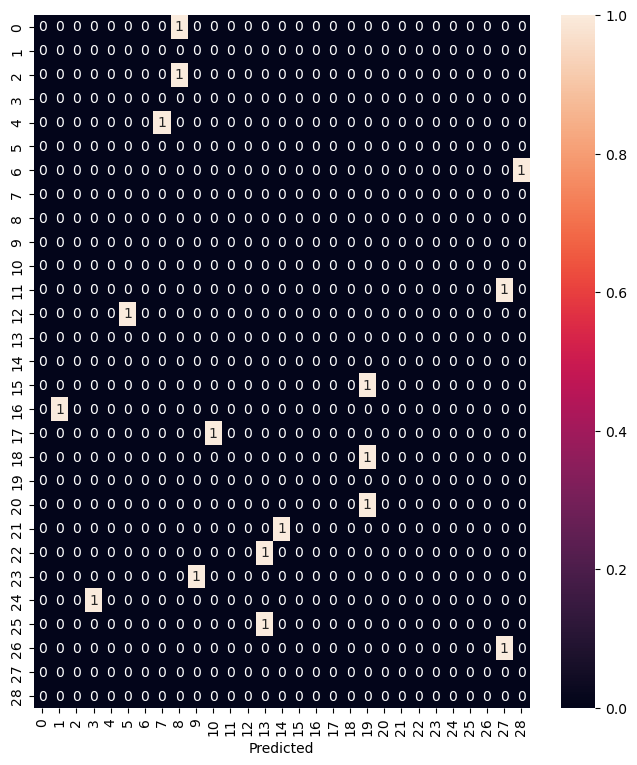

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(8,9))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel=('Truth')

In [ ]:
#The coloured boxes 1 shows how accurately they are predicted